In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv('breast-cancer-wisconsin.data', header=None)

In [3]:
data.columns=['Sample code number','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion',
              'Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mithoses','Class']

In [4]:
data.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mithoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
data.isnull().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mithoses                       0
Class                          0
dtype: int64

In [6]:
# Removing id column from df
data = data.drop('Sample code number', axis=1)

In [7]:
data.isnull().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mithoses                       0
Class                          0
dtype: int64

In [8]:
data = data.replace("?", np.nan)
data = data.dropna()

# Eda

In [9]:
cls = data['Class'].value_counts()

In [10]:
cls

2    444
4    239
Name: Class, dtype: int64

<AxesSubplot: >

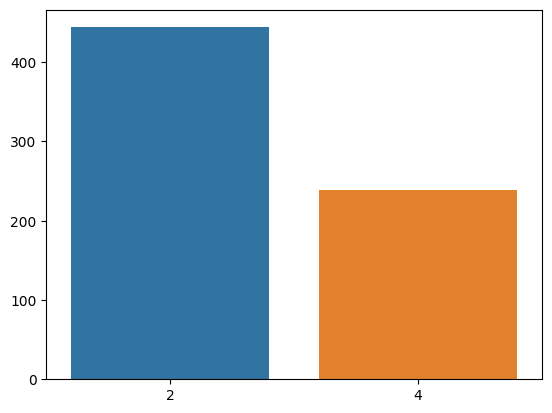

In [11]:
sns.barplot(x=cls.index,y=cls.values)

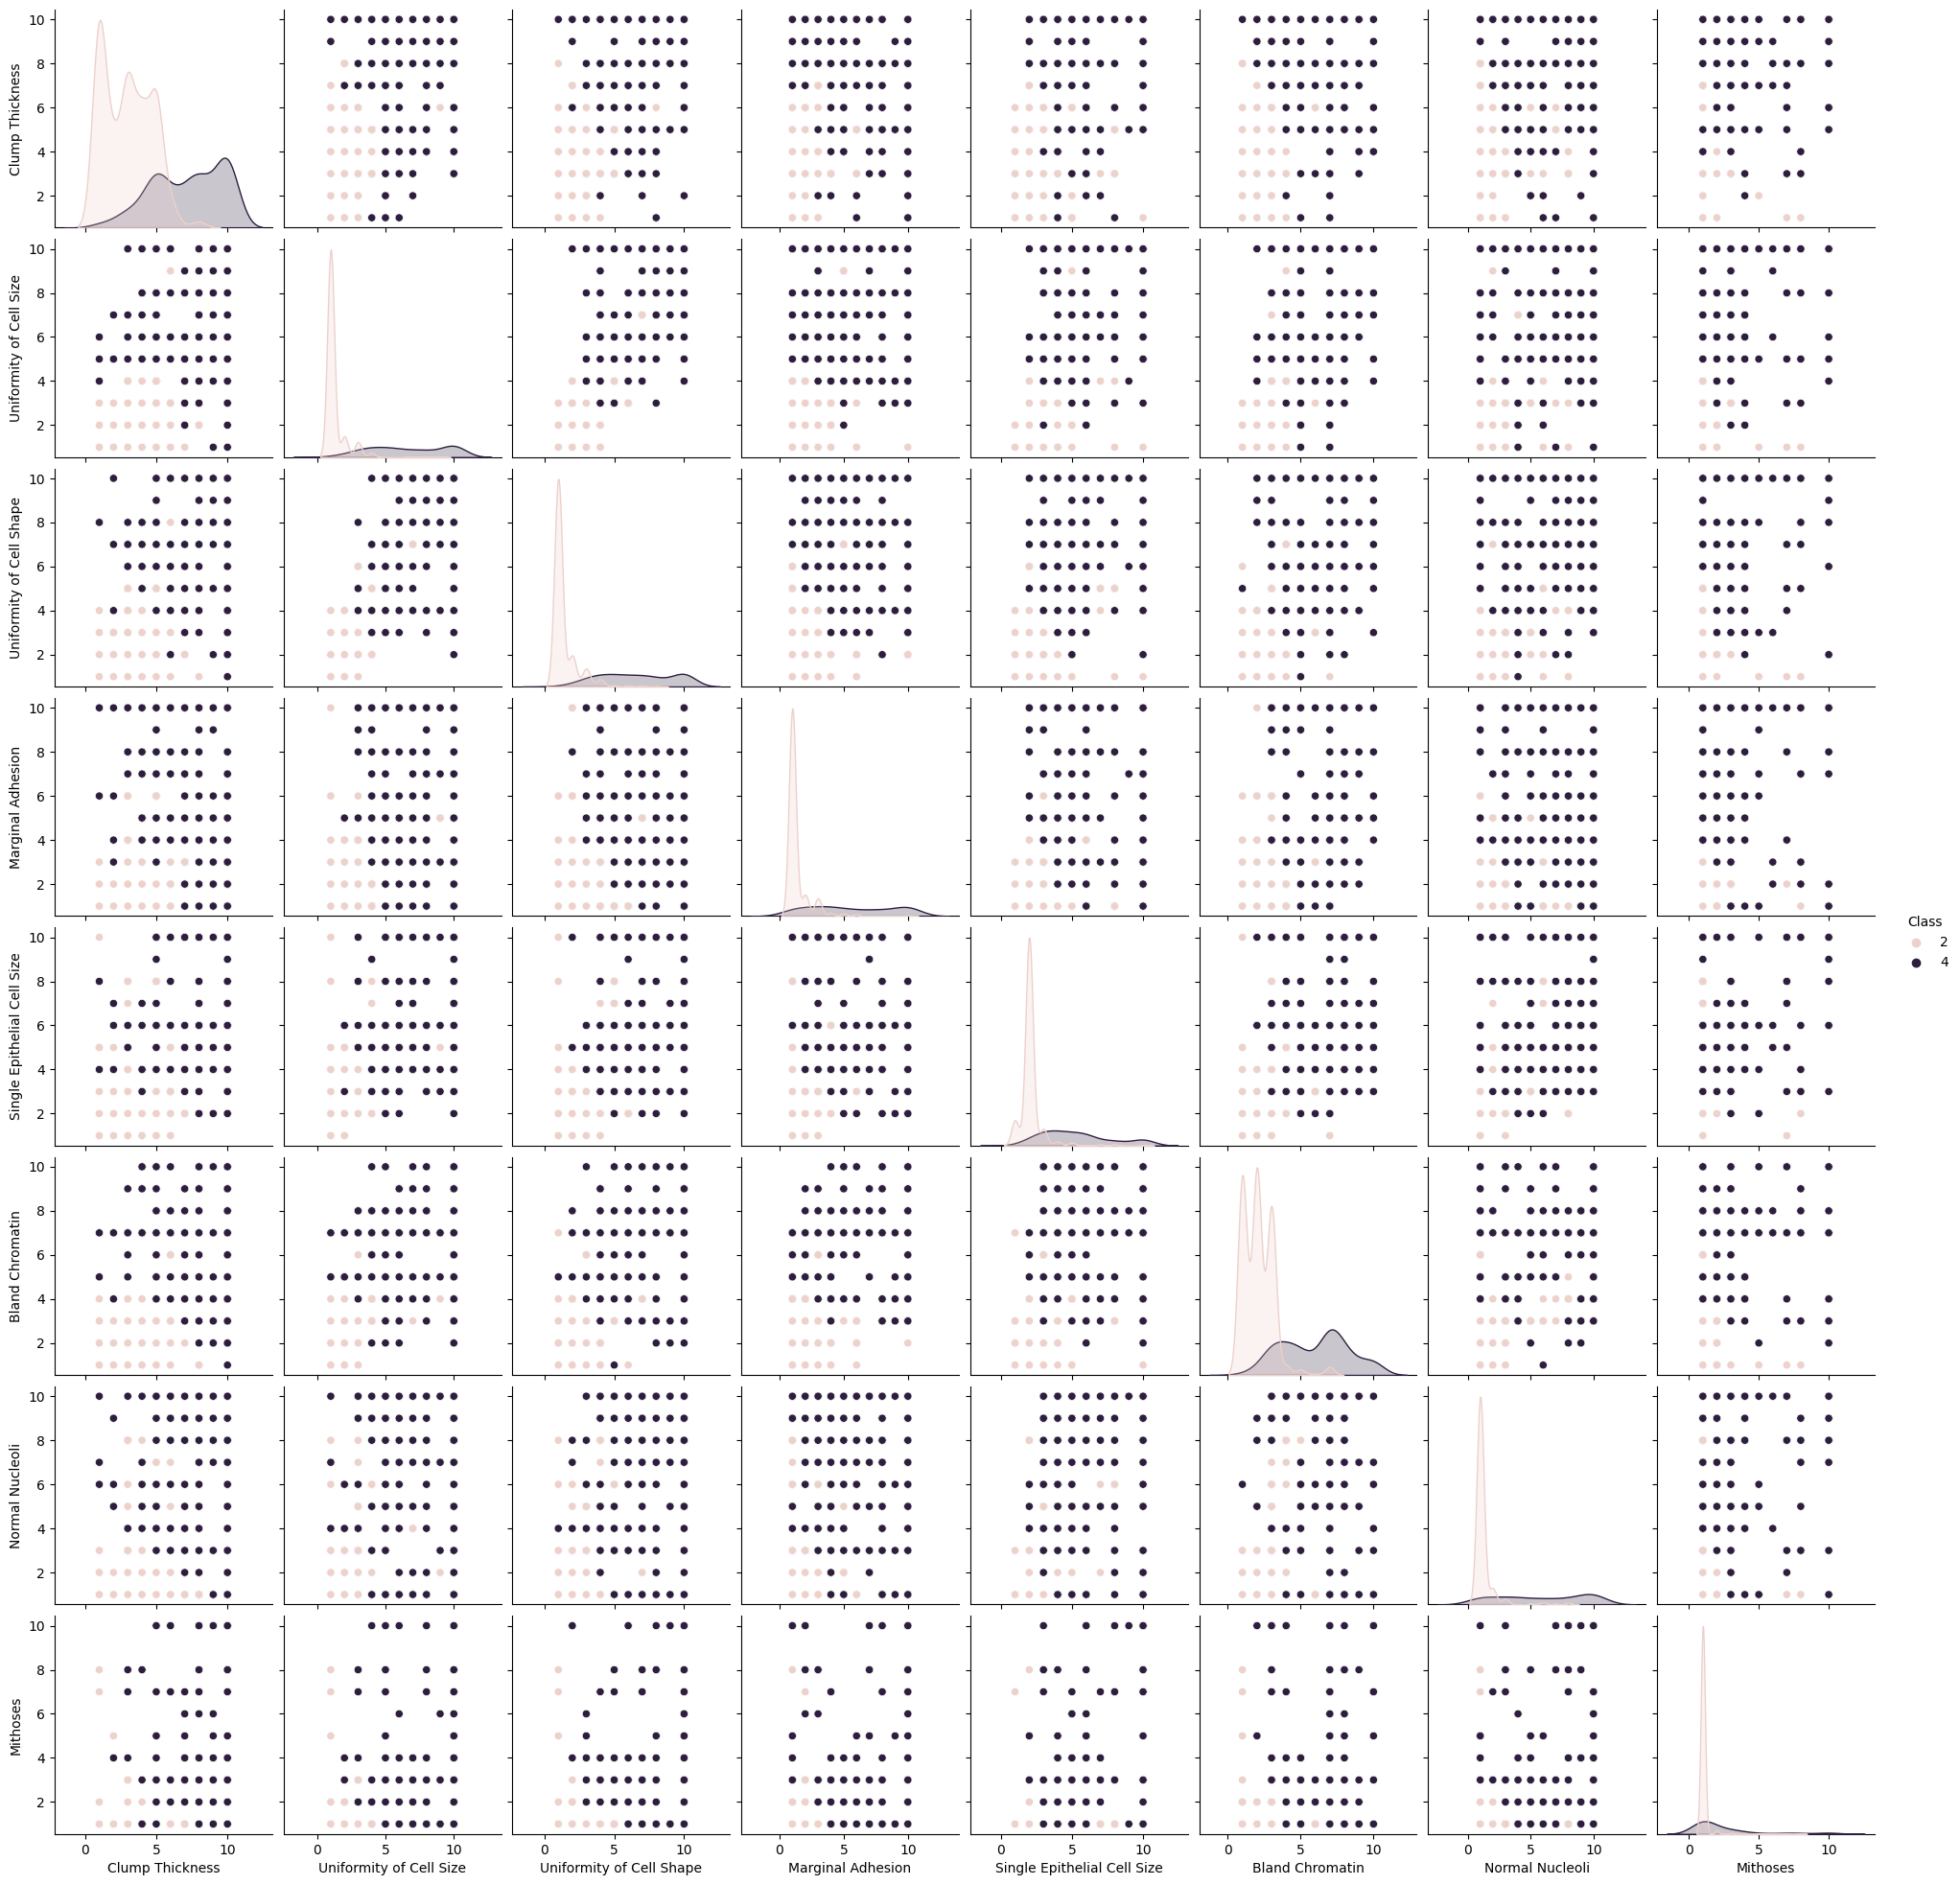

In [12]:
sns.pairplot(data, hue = 'Class')

In [13]:
data.head(1
         )

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mithoses,Class
0,5,1,1,1,2,1,3,1,1,2


Text(0.5, 1.0, 'Clump Thickness vs Uniformity of Cell Shape')

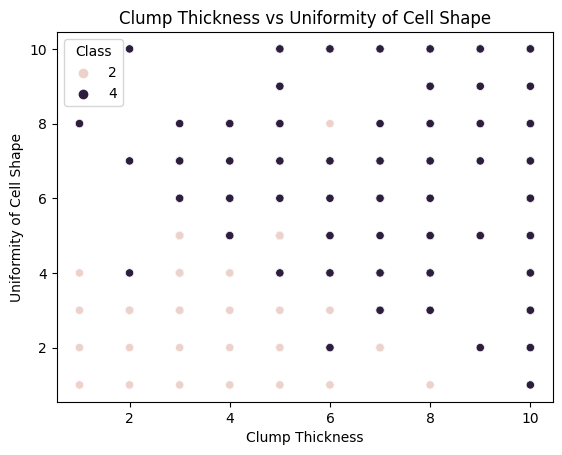

In [14]:
sns.scatterplot(x=data['Clump Thickness'],y=data['Uniformity of Cell Shape'],hue=data['Class'])
plt.title('Clump Thickness vs Uniformity of Cell Shape')

Text(0.5, 1.0, 'Uniformity of Cell Size vs Single Epithelial Cell Size')

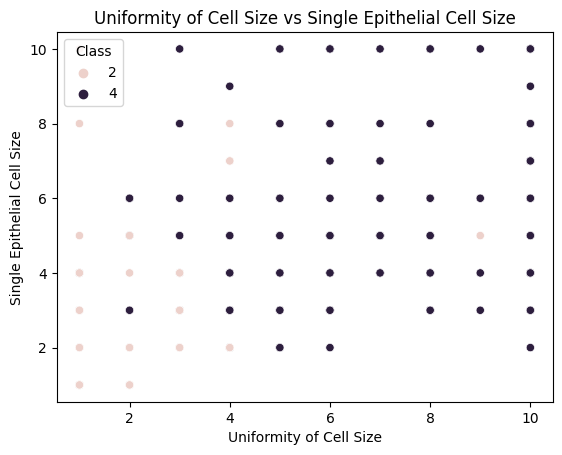

In [15]:
sns.scatterplot(x=data['Uniformity of Cell Size'],y=data['Single Epithelial Cell Size'],hue=data['Class'])
plt.title('Uniformity of Cell Size vs Single Epithelial Cell Size')

Text(0.5, 1.0, 'Bare Nuclei and Normal Nucleoli')

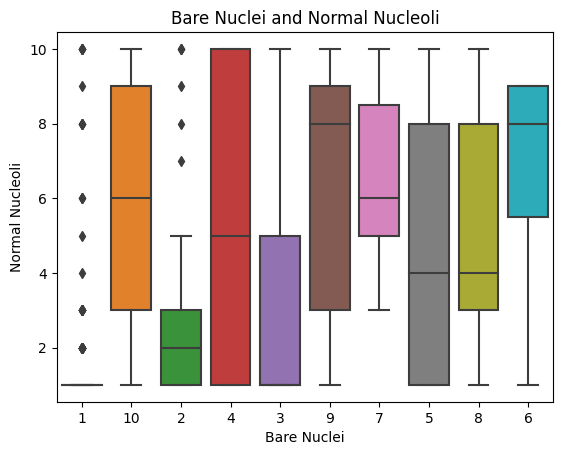

In [16]:
sns.boxplot(x="Bare Nuclei", y="Normal Nucleoli", data=data)
plt.title('Bare Nuclei and Normal Nucleoli')

C:\Users\harsh\AppData\Local\Temp\ipykernel_21748\730180483.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<AxesSubplot: >

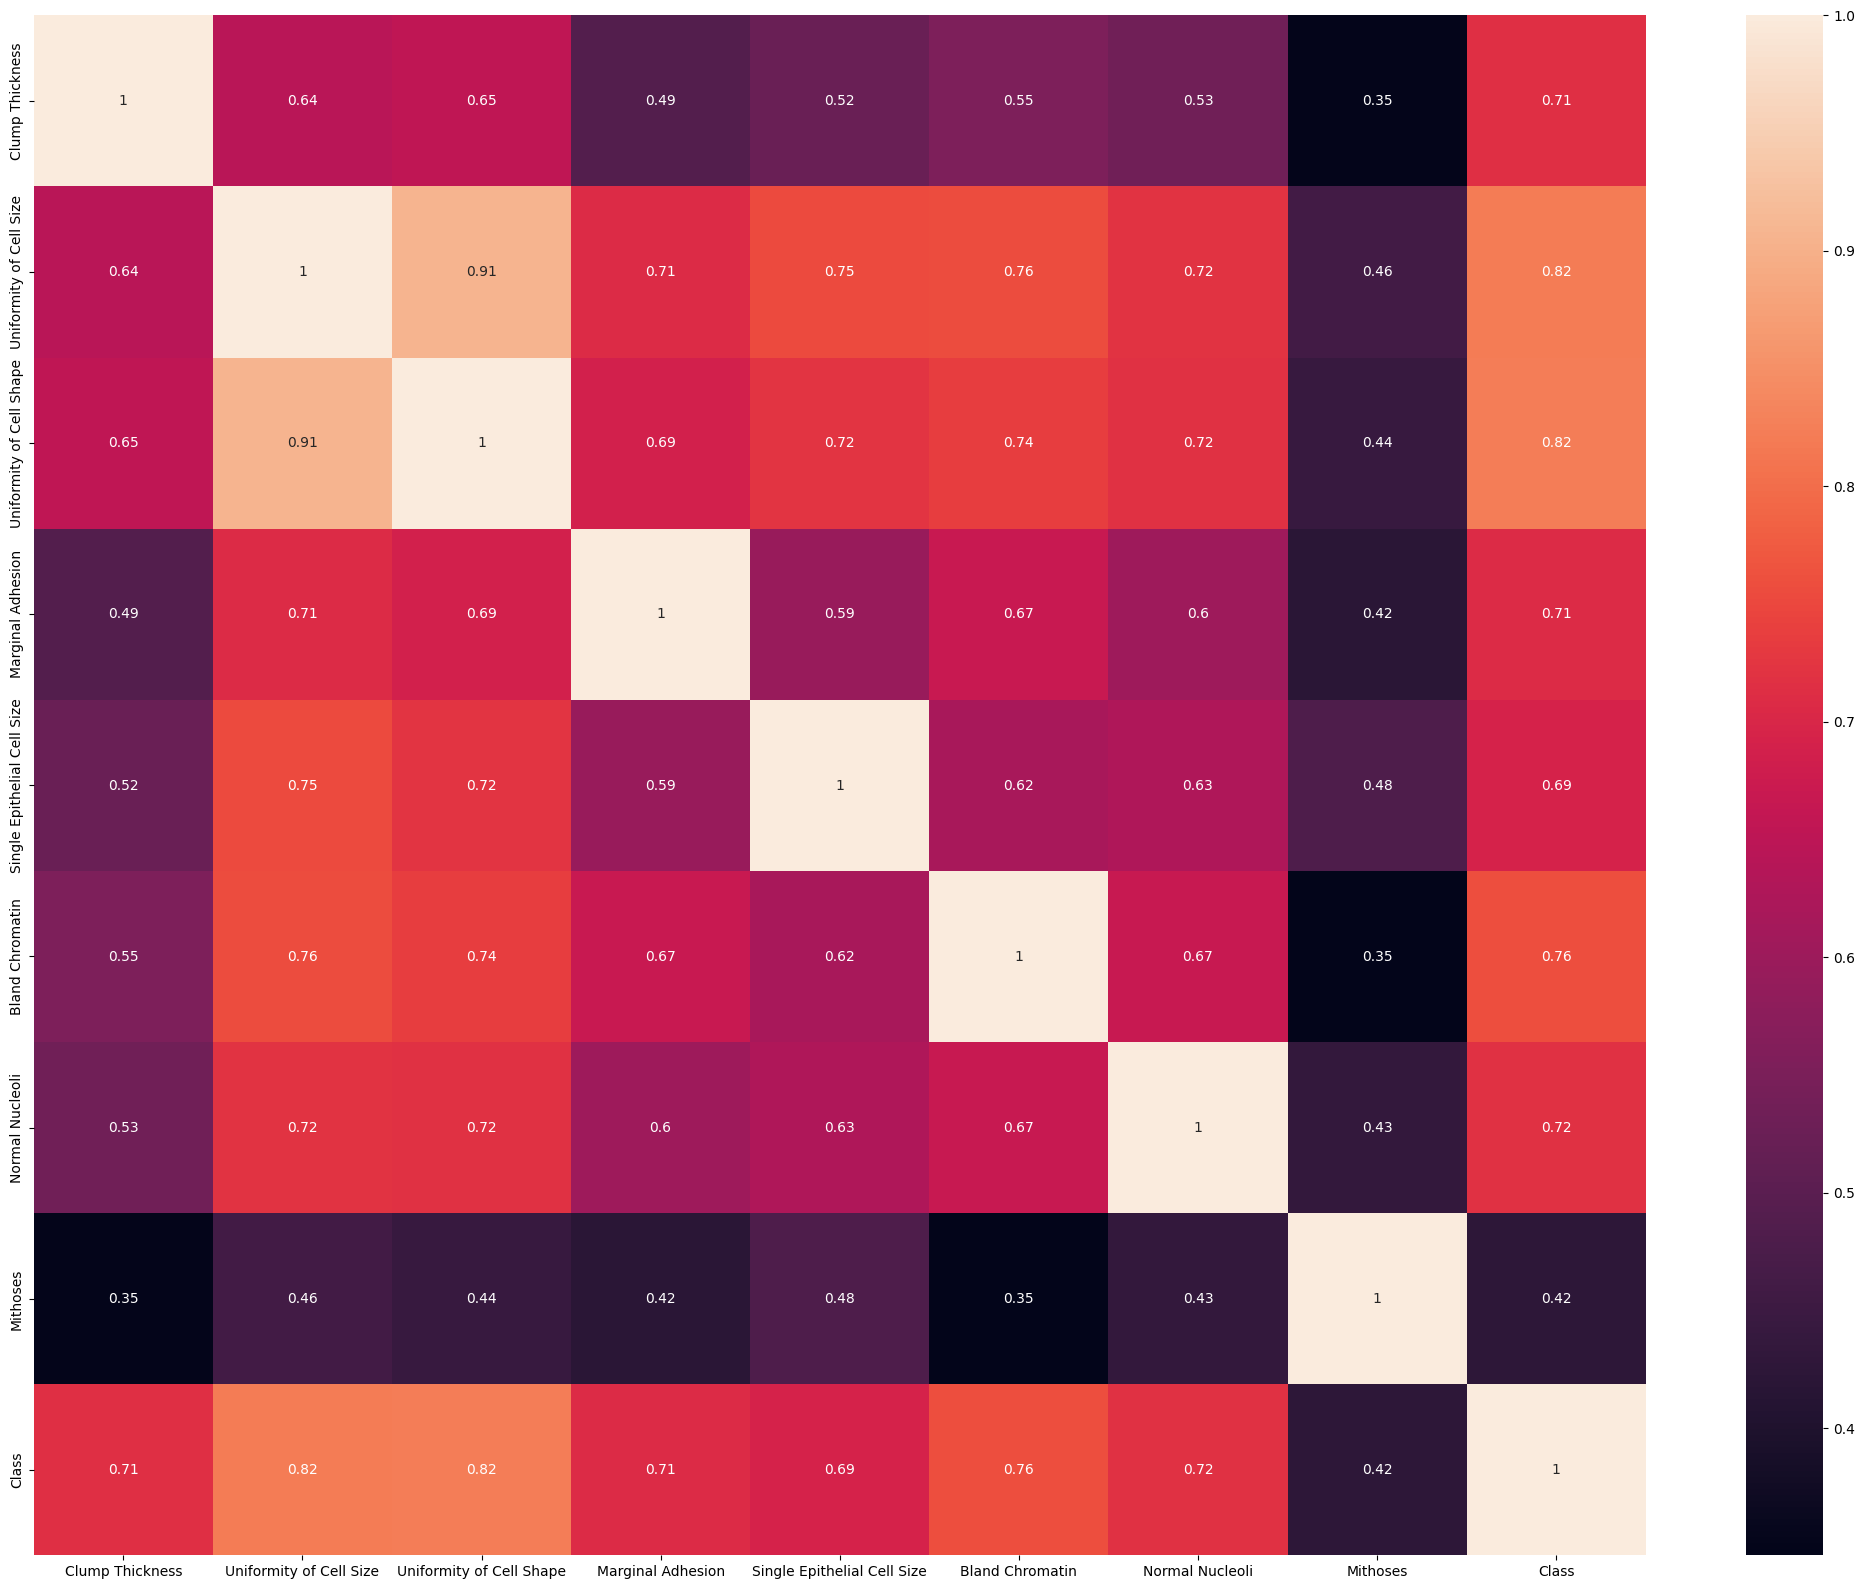

In [17]:
plt.figure(figsize=(26,20))
sns.heatmap(data.corr(), annot=True)

In [18]:
data["Clump Thickness"].unique()

array([ 5,  3,  6,  4,  8,  1,  2,  7, 10,  9], dtype=int64)

## Model building

In [19]:
X = data.drop('Class',axis=1)
y = data['Class']

In [20]:
norm=MinMaxScaler()
X=norm.fit_transform(X)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
lr = LogisticRegression(random_state=42)

In [23]:
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [24]:
y_pred = lr.predict(X_test)

In [25]:
print(y_pred)

[4 4 2 2 2 2 2 2 4 2 2 2 2 2 2 4 2 4 2 4 4 2 4 2 2 2 4 4 2 4 2 4 4 4 2 2 4
 2 4 4 2 4 4 2 2 4 2 4 2 4 2 2 2 4 2 4 2 2 2 4 2 2 2 4 2 2 4 2 2 2 4 2 2 2
 4 4 2 2 4 4 4 4 2 4 2 4 2 2 4 2 2 4 2 2 2 2 4 4 2 2 2 2 4 2 4 2 2 2 4 2 4
 4 4 2 2 2 2 2 2 2 4 4 2 2 2 2 4 2 4 2 2 2 4 4 4 2 2]


In [27]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Predicted labels:", y_pred)
print("Accuracy:", accuracy)

Predicted labels: [4 4 2 2 2 2 2 2 4 2 2 2 2 2 2 4 2 4 2 4 4 2 4 2 2 2 4 4 2 4 2 4 4 4 2 2 4
 2 4 4 2 4 4 2 2 4 2 4 2 4 2 2 2 4 2 4 2 2 2 4 2 2 2 4 2 2 4 2 2 2 4 2 2 2
 4 4 2 2 4 4 4 4 2 4 2 4 2 2 4 2 2 4 2 2 2 2 4 4 2 2 2 2 4 2 4 2 2 2 4 2 4
 4 4 2 2 2 2 2 2 2 4 4 2 2 2 2 4 2 4 2 2 2 4 4 4 2 2]
Accuracy: 0.948905109489051
